In [2]:
import utils
import evaluator
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_colwidth', -1)
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

experiment_id = 'en_it_largest_range_200000_short_casefolded' 
lang_codes_to_evaluate = ['en', 'it']
lang_pair = ['en', 'it']

diff_eigs, diff_cg, diff_dims, diff_lambda = utils.print_different_param_vals(experiment_id)

Eigenvalue decomposition tolerance
[1.0]
CG tolerance
[2.0]
Dimensions
['300']
Regularisation parameter
[6.0, 4.0, 2.5, 1.0, 0.5]


Impossible to import Faiss-GPU. Switching to FAISS-CPU, this will be slower.



# Full experiment results

Validation dataset file name - extended da_en_it_vi_200000_lt_100_ut_700_ml_2_size_2000_inter_false_tsf_false_suffix_no_int_50_1000
Validation dataset full name da_en_it_vi_200000_lt_100_ut_700_ml_2_size_2000_inter_false_tsf_false_suffix_no_int_50_1000_en_it_200000_lt_50_ut_1000_ml_2_da_en_it_vi_200000_lt_100_ut_700_ml_2_size_2000_inter_false_casefolded
Final validation dataset file already generated. Exists as:  da_en_it_vi_200000_lt_100_ut_700_ml_2_size_2000_inter_false_tsf_false_suffix_no_int_50_1000_en_it_200000_lt_50_ut_1000_ml_2_da_en_it_vi_200000_lt_100_ut_700_ml_2_size_2000_inter_false_casefolded
Running get_val_concepts_from_validation_set
Running get_test_concepts_from_validation_set
Validation dataset file name - extended da_en_it_vi_200000_lt_100_ut_700_ml_2_size_2000_inter_false_tsf_false_suffix_no_int_50_1000
Validation dataset full name da_en_it_vi_200000_lt_100_ut_700_ml_2_size_2000_inter_false_tsf_false_suffix_no_int_50_1000_en_it_200000_lt_50_ut_1000_ml_2_da_en_it_vi_

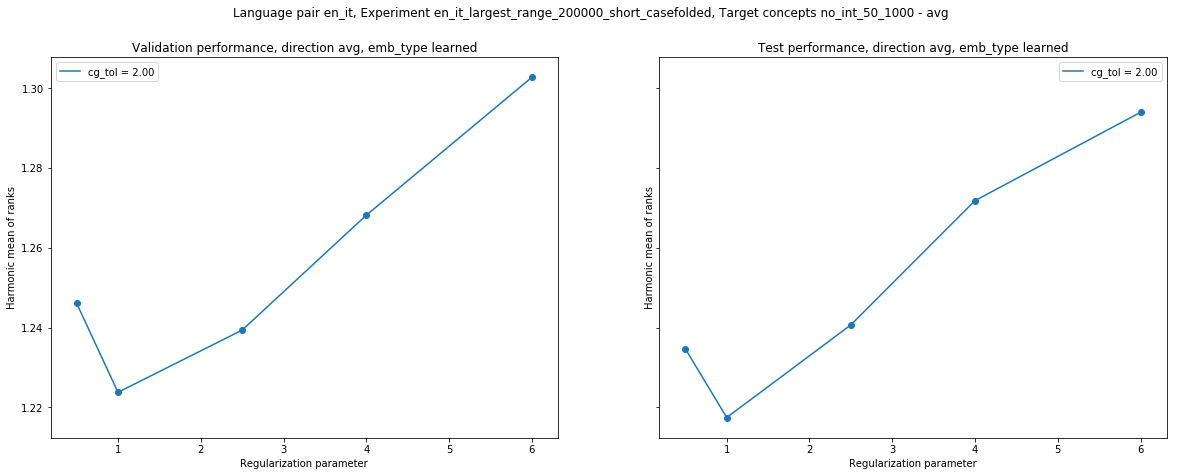

In [2]:
params = {
    "lang_codes_to_evaluate" : ['en', 'it'],
    #"lang_pairs_to_evaluate" : [['en', 'da'], ['da', 'vi']],
    
    "experiment_id" : experiment_id,
    "vocabulary_size" : 200000,
    
    #"target_concepts_suffix" : "no_int_50_1000",
    "target_concepts_suffixes" : ["no_int_50_1000"],
    
    "_dir" : 'avg',
    "dimensions" : 300,
    "validation_set_file_name" : None
    }

utils.evaluate_experiment_diff_target_concepts(**params)

## Execution time analysis

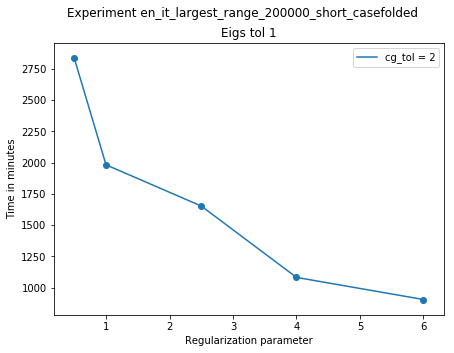

In [3]:
utils.plot_processing_time(experiment_id)

# Best run results

## Retireve experiment run using the experiment id and training parameters

In [6]:
dimensions = 300
_lambda = 1 # regularization_parameter
cg_tol_1 = cg_tol_2 = 2 # 10 ** (-2)
eigs_tol_1 = eigs_tol_2 = 1 # 10 ** (0.3)
lang_codes_to_evaluate = ['en', 'it']

# The log file, that logs all the runs for a given experiment is named same as the experiment
# Finds the experiment id from the runs logger, and returns the matched line if return_line flag is set to true
experiment_run_id = utils.get_run_identifier(experiment_id, dimensions, _lambda, cg_tol_1, eigs_tol_1, cg_tol_2, eigs_tol_2, return_line = True)
print(experiment_run_id)
experiment_run_id = experiment_run_id[0]
eval_obj = evaluator.Evaluator(experiment_run_id, lang_codes_to_evaluate, vocabulary_size=65000, test_set_flag = True, target_concepts_suffix = "no_int_50_1000")

('en_it_largest_range_200000_short_casefolded_5', ['en_it_largest_range_200000_short_casefolded_5 lambda 1.00 cg_tol 2.00 2.00 eigs_tol 1.00 1.00 dims 300'])
Validation dataset file name - extended da_en_it_vi_200000_lt_100_ut_700_ml_2_size_2000_inter_false_tsf_true_suffix_no_int_50_1000
Validation dataset full name da_en_it_vi_200000_lt_100_ut_700_ml_2_size_2000_inter_false_tsf_true_suffix_no_int_50_1000_en_it_200000_lt_50_ut_1000_ml_2_da_en_it_vi_200000_lt_100_ut_700_ml_2_size_2000_inter_false_casefolded
Final validation dataset file already generated. Exists as:  da_en_it_vi_200000_lt_100_ut_700_ml_2_size_2000_inter_false_tsf_true_suffix_no_int_50_1000_en_it_200000_lt_50_ut_1000_ml_2_da_en_it_vi_200000_lt_100_ut_700_ml_2_size_2000_inter_false_casefolded
Running get_test_concepts_from_validation_set


## Important numbers

In [7]:
eval_obj.print_important_numbers()

*** Training phase ***
# Training documents: {'en': 484795, 'it': 483835}
# Training sets vocabulary size: {'en': 200000, 'it': 200000}
*** Evaluation phase ***
# Queries: {'it_vi': 1000, 'da_it': 1000, 'en_vi': 1000, 'da_vi': 1000, 'da_en': 1000, 'en_it': 1000}
# Target documents: {'en': 202852, 'it': 202363}
# Evaluation datasets vocabulary size: {'en': 197610, 'it': 199897}


## Precisions

In [7]:
dfs = {}
for emb_type in ['learned', 'baseline']:
    for metric in ['csls_knn_10', 'cosine']:
        print()
        s = '** Emb_type: {}, Metric: {} **'.format(emb_type, metric)
        print(s)
        print()
        df = eval_obj.get_overall_precision(emb_type=emb_type, metric=metric)
        dfs[s] = df
        display(df)


** Emb_type: learned, Metric: csls_knn_10 **

Embeddings type:  learned
Getting ranked concepts for  ['en', 'it']
Generating doc embeddings for learned
Reading embeddings
197610 words in the intersection between training and evaluation in en
199897 words in the intersection between training and evaluation in it
Ranking with csls_knn_10
Ranking with csls_knn_10


,P@1,P@5,P@10
pair,,,
en_it,71.90,85.80,90.30
it_en,79.00,90.20,91.90



** Emb_type: learned, Metric: cosine **

Embeddings type:  learned
Getting ranked concepts for  ['en', 'it']
Ranking with cosine
Ranking with cosine


,P@1,P@5,P@10
pair,,,
en_it,74.60,86.40,88.90
it_en,80.00,89.80,91.50



** Emb_type: baseline, Metric: csls_knn_10 **

Embeddings type:  baseline
Getting ranked concepts for  ['en', 'it']
Generating doc embeddings for baseline
Reading baseline embeddings
153964 words in the intersection between training and evaluation in en
167016 words in the intersection between training and evaluation in it
Ranking with csls_knn_10
Ranking with csls_knn_10


,P@1,P@5,P@10
pair,,,
en_it,40.00,56.70,63.20
it_en,48.60,62.70,68.40



** Emb_type: baseline, Metric: cosine **

Embeddings type:  baseline
Getting ranked concepts for  ['en', 'it']
Ranking with cosine
Ranking with cosine


,P@1,P@5,P@10
pair,,,
en_it,32.90,48.90,55.40
it_en,38.30,52.20,58.90
